In [2]:
setwd("/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1011. Emission Mixtures/P1011.3. Analyses/P1011.3.4. Volcano Plot")
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1011. Emission Mixtures/P1011.3. Analyses/P1011.3.4. Volcano Plot/Output')
cur_date = "052223"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
library(MetBrewer)

#reading in file
protein_df = data.frame(read_excel("Input/Proteomics_Wilcoxon_Results_052223.xlsx"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
head(protein_df)

,Protein,Condensate,Comparison,Concentration,log2FC,Statistic,P.Value,P.Adj
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,CO3_HUMAN,Cardboard,Control vs. Flaming,25,0.0131508845872566,10,1,1.0000000
2,CO3_HUMAN,Plastic,Control vs. Flaming,25,0.0275319721273315,8,0.6875,0.9082963
3,K1C19_HUMAN,Cardboard,Control vs. Flaming,25,0.0613937490505141,1,0.0625,0.3600251
4,K1C19_HUMAN,Plastic,Control vs. Flaming,25,0.0715081651145776,1,0.0625,0.3600251
5,TBB4B_HUMAN,Cardboard,Control vs. Flaming,25,0.0666893693429102,3,0.15625,0.3776904
6,TBB4B_HUMAN,Plastic,Control vs. Flaming,25,0.0777322671177726,3,0.15625,0.3776904


In [31]:
# adding a col to denote whether a protein had a significant p adjust value, log FC, or both
protein_df$log2FC = as.numeric(protein_df$log2FC)
protein_df$P.Value = as.numeric(protein_df$P.Value)

# add a column of NAs
protein_df$diffexpressed <- "No Significance"

# if p adjust is significant only
protein_df$diffexpressed[protein_df$P.Value < 0.04] <- "P Adjust Only"

# if log2FC > log2(1.3) and P.Value < 0.04, set as "UP" 
protein_df$diffexpressed[abs(protein_df$log2FC) > abs(log2(1.3)) & protein_df$P.Value < 0.04] <- "P Adjust and log2 Fold Change"

# making into a factor
protein_df$diffexpressed = factor(protein_df$diffexpressed, levels = c("No Significance", "P Adjust Only", 
                                                                       "P Adjust and log2 Fold Change"))

# putting cols into a factor
protein_df$Condensate = factor(protein_df$Condensate)
protein_df$Comparison = factor(protein_df$Comparison)

# viewing df
head(protein_df)

,Protein,Condensate,Comparison,Concentration,log2FC,Statistic,P.Value,P.Adj,diffexpressed
,<chr>,<fct>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>
1,CO3_HUMAN,Cardboard,Control vs. Flaming,25,0.01315088,10,1.00000,1.0000000,No Significance
2,CO3_HUMAN,Plastic,Control vs. Flaming,25,0.02753197,8,0.68750,0.9082963,No Significance
3,K1C19_HUMAN,Cardboard,Control vs. Flaming,25,0.06139375,1,0.06250,0.3600251,No Significance
4,K1C19_HUMAN,Plastic,Control vs. Flaming,25,0.07150817,1,0.06250,0.3600251,No Significance
5,TBB4B_HUMAN,Cardboard,Control vs. Flaming,25,0.06668937,3,0.15625,0.3776904,No Significance
6,TBB4B_HUMAN,Plastic,Control vs. Flaming,25,0.07773227,3,0.15625,0.3776904,No Significance


# Volcano Plot

Warning message:
“Removed 60 rows containing missing values (`geom_point()`).”


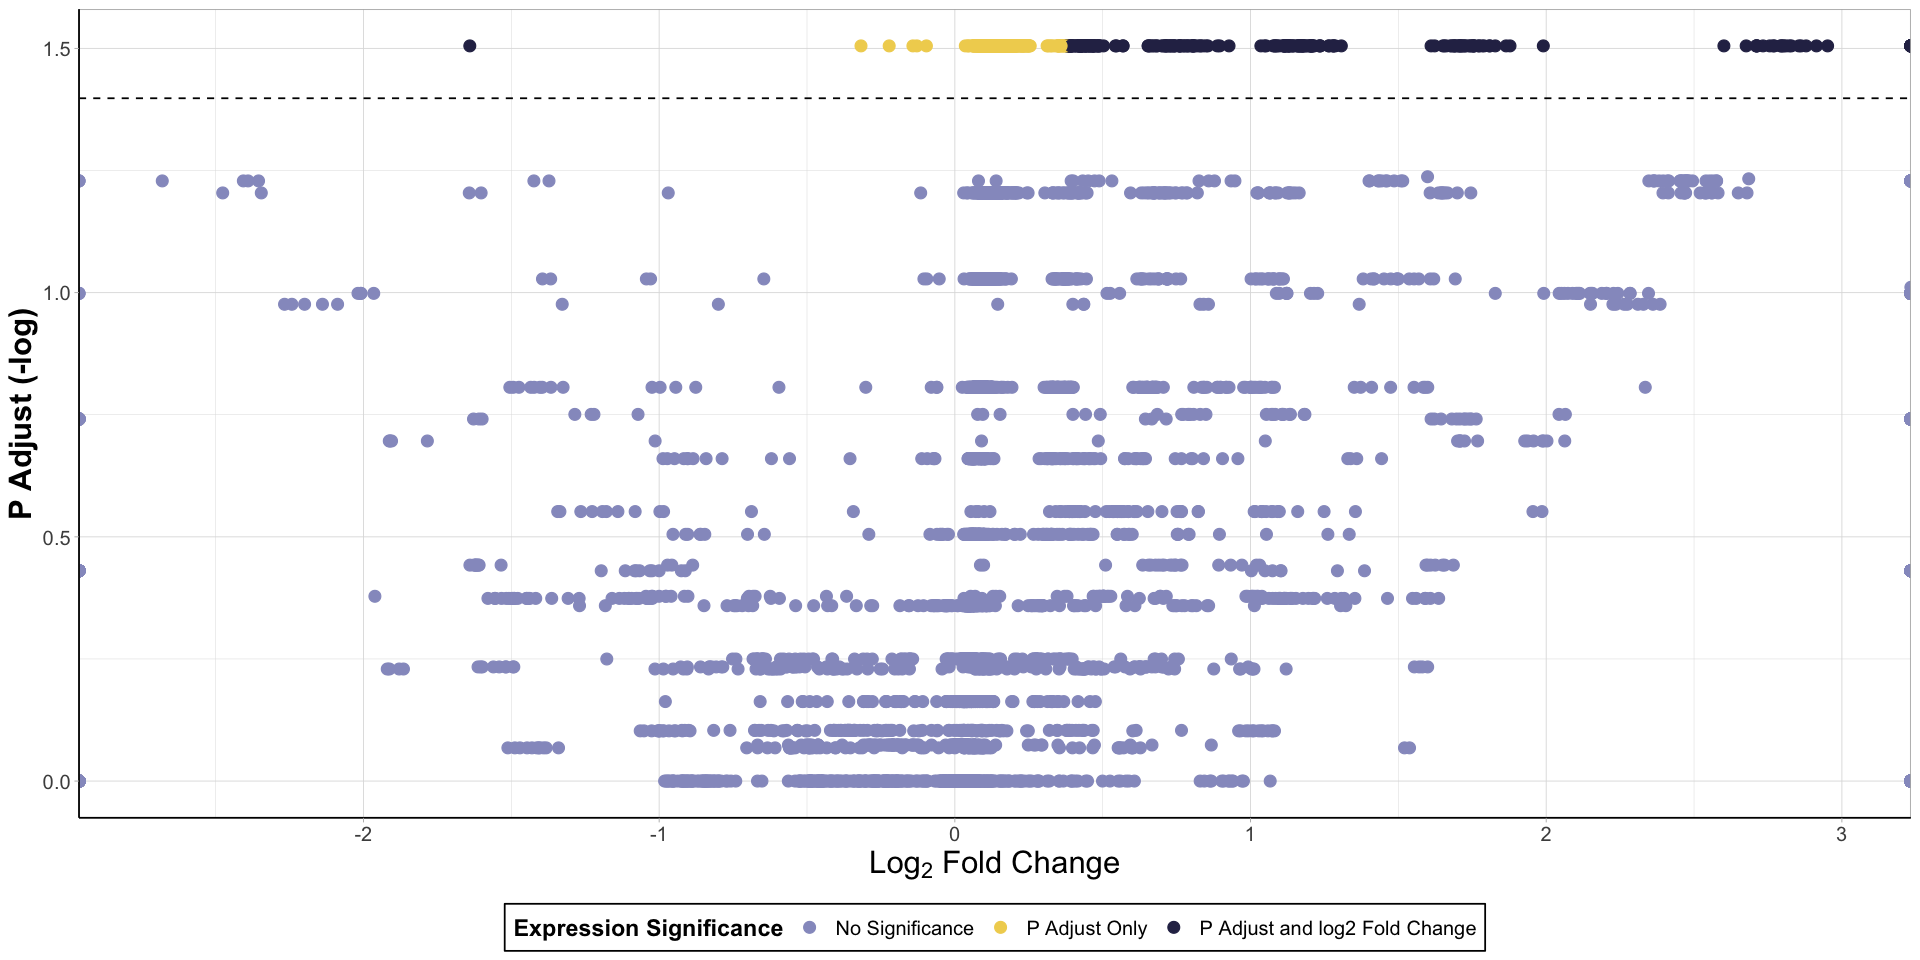

In [34]:
options(repr.plot.width=16, repr.plot.height=8) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$VanGogh1[[1]]

ggplot() + 
  geom_point(data = protein_df %>%
             filter(Comparison == "Control vs. Flaming" & Condensate == "Cardboard"), 
             aes(x = log2FC, y = -log10(P.Value), color = diffexpressed), size = 3) + 

#   #labeling points with statistical significance and FC
#   geom_text_repel(data = protein_df %>%
#                       filter(log2FC > log2(1.3) & diffexpressed == "P Adjust and log2 Fold Change"), 
#     aes(x = log2FC, y = -log10(P.Value), label = Protein, color = diffexpressed),
#     xlim = c(2, NA),
#     hjust = 0,
#     segment.size = 0.4,
#      box.padding = 0.7,
#      max.overlaps = Inf,
#     size = 5, 
#     show.legend = FALSE) + 

#   geom_text_repel(data = protein_df %>%
#                       filter(log2FC < log2(1.3) & diffexpressed == "P Adjust and log2 Fold Change"), 
#     aes(x = log2FC, y = -log10(P.Value), label = Protein, color = diffexpressed),
#     xlim = c(NA, -2),
#     hjust = 1,
#     segment.size = 0.4,
#      box.padding = 0.7,
#      max.overlaps = Inf,
#     size = 5, 
#     show.legend = FALSE) + 

  # P Adjust line
  geom_hline(yintercept = -log10(0.04), linetype = "dashed") + 

  #facet_wrap(~Condensate, scales = "free") + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = expression(Log[2]*" Fold Change"), y = 'P Adjust (-log)') + 

  scale_color_manual(name = "Expression Significance",
                      values = c(metbrewer_colors[4], '#F0D25E', metbrewer_colors[1]))